In [3]:
import pyEDM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

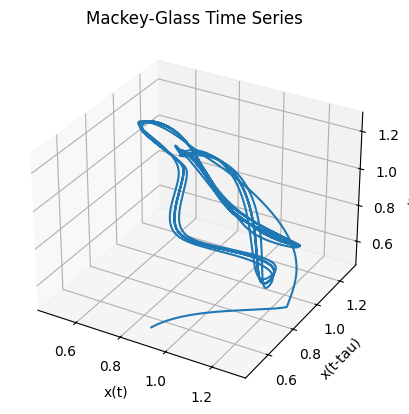

In [89]:
def mackey_glass(x, x_tau, beta, gamma, n):
    return beta * x_tau / (1 + x_tau ** n) - gamma * x

def generate_time_series(tau, n, beta, gamma, x0, dt, t_max):
    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)

    # 初期値の設定
    tau_idx = int(tau / dt)
    x[:tau_idx] = x0

    # 時系列データの生成
    for i in range(tau_idx, len(t)):
        x[i] = x[i-1] + dt * mackey_glass(x[i-1], x[i-tau_idx], beta, gamma, n)

    return t, x

# Mackey-Glass方程式のパラメータ
tau = 15
n = 10
beta = 0.2
gamma = 0.1

# 初期値と時間ステップ
x0 = 0.5
dt = 0.1
t_max = 500

# 時系列データの生成
t, x = generate_time_series(tau, n, beta, gamma, x0, dt, t_max)

# 遅延時間に対応する配列のインデックス
tau_idx = int(tau / dt)
tau2_idx = int(2 * tau / dt)

# x(t), x(t-tau), x(t-2tau)のデータ抽出
x_t = x[tau2_idx:]
x_t_tau = x[tau_idx:-tau_idx]
x_t_2tau = x[:-tau2_idx]

# 3Dプロットの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_t, x_t_tau, x_t_2tau)
ax.set_xlabel('x(t)')
ax.set_ylabel('x(t-tau)')
ax.set_zlabel('x(t-2tau)')
plt.title('Mackey-Glass Time Series')
plt.show()

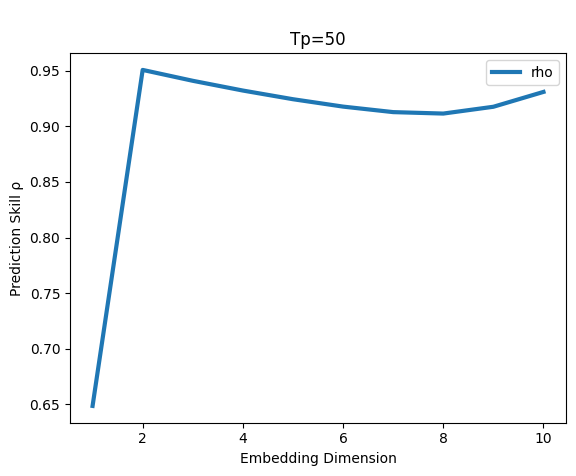

In [93]:
df = pd.DataFrame({"x_t": x_t, "x_t_tau": x_t_tau})
embedding = pyEDM.EmbedDimension(dataFrame=df, columns="x_t", lib="1 800", pred="801 1000", Tp=50, tau=-10, maxE=10, noTime=True)

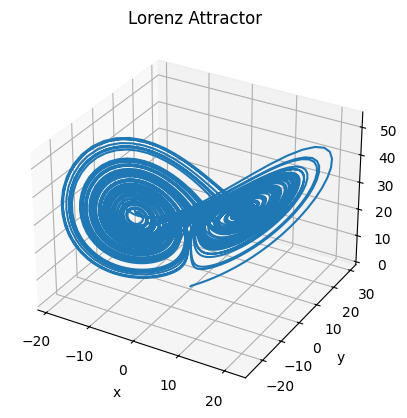

In [80]:
# ローレンツ方程式を表す関数
def lorenz(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

# 時系列データを生成する関数
def generate_lorenz_series(sigma, rho, beta, x0, y0, z0, dt, t_max):
    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)

    # 初期値の設定
    x[0] = x0
    y[0] = y0
    z[0] = z0

    # 時系列データの生成
    for i in range(1, len(t)):
        dx, dy, dz = lorenz(x[i-1], y[i-1], z[i-1], sigma, rho, beta)
        x[i] = x[i-1] + dt * dx
        y[i] = y[i-1] + dt * dy
        z[i] = z[i-1] + dt * dz

    return t, x, y, z

# ローレンツ方程式のパラメータ
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# 初期値と時間ステップ
x0 = 0.1
y0 = 0.0
z0 = 0.0
dt = 0.01
t_max = 100

# 時系列データの生成
t, x, y, z = generate_lorenz_series(sigma, rho, beta, x0, y0, z0, dt, t_max)

# 3Dプロットの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Lorenz Attractor')
plt.show()

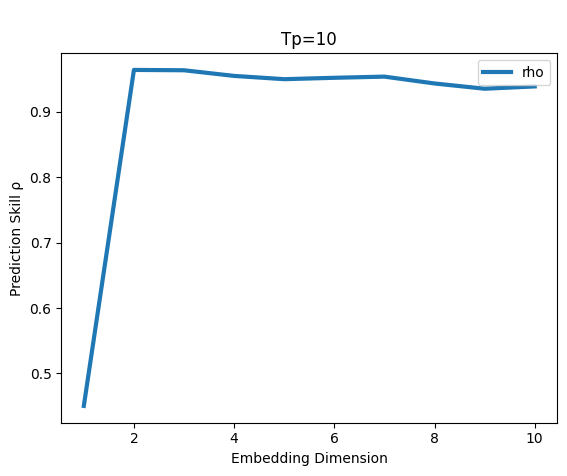

In [84]:
df = pd.DataFrame({"x": x[::5]})
embedding = pyEDM.EmbedDimension(dataFrame=df, columns="x", lib="1 1800", pred="1801 2000", Tp=10, tau=-3, maxE=10, noTime=True)

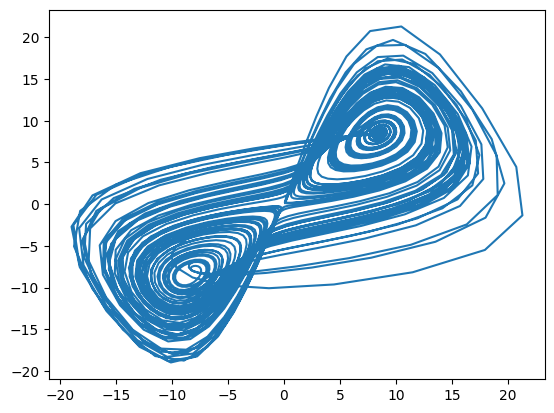

In [88]:
plt.plot(x[::3][:-4],x[::3][4:])